# Bryce Hill | ECEN 4562

## Lab 06 - PAM Receiver with Matched Filter and Symbol Timing Extraction



### 3/21/17

In [1]:
# Import libraries
from pylab import *         # Imports numpy (as np) and matplotlib (as mpl)
import numpy as np
import scipy.integrate as integrate
%matplotlib inline 
                            # Adds interactive matplotlib backend
plt.rc('text', usetex=True) # Enable the use of LaTeX for plot titles/labels

# Import my libraries
import my_grc
import my_sdr as sdr
import my_jupyter
import my_ft as ft
import my_ascbin as ascbin

** <span style="color:red"> NOTE: must run *install_bryce_lib.sh* file to install libraries onto your computer. When done simply run the *uninstall_bryce_lib.sh* script </span>. **

In [2]:
print(my_grc.testmy_grc())
my_jupyter.my_settings()

Package gnuradiopkg imported correctly
Plot settings imported into current workspace


## Experiment 1:  LPF with Trapezoidal Frequency Response. 

### ----------------------------------------------------------------------------------------------------------------
 
 - ** 1.a - Unit impulse response of LPF **

### ----------------------------------------------------------------------------------------------------------------

In [3]:
# Filtfun module implemented

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.b - Test Trapfilt **

### --------------------------------------------------------------------------------------------------------------

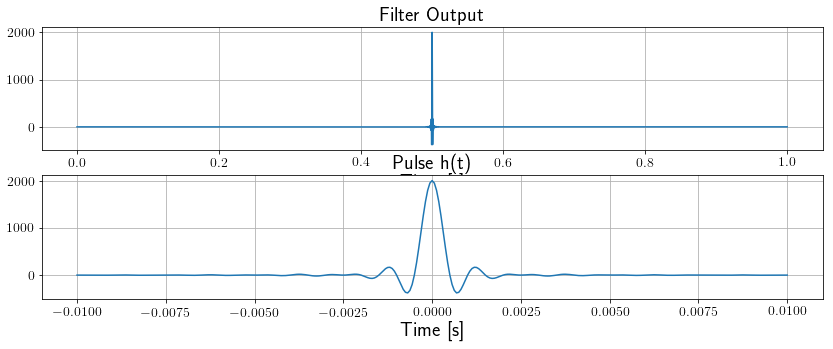

f1:  -2000.0 | f2:  2000.0  | llim:  0.001


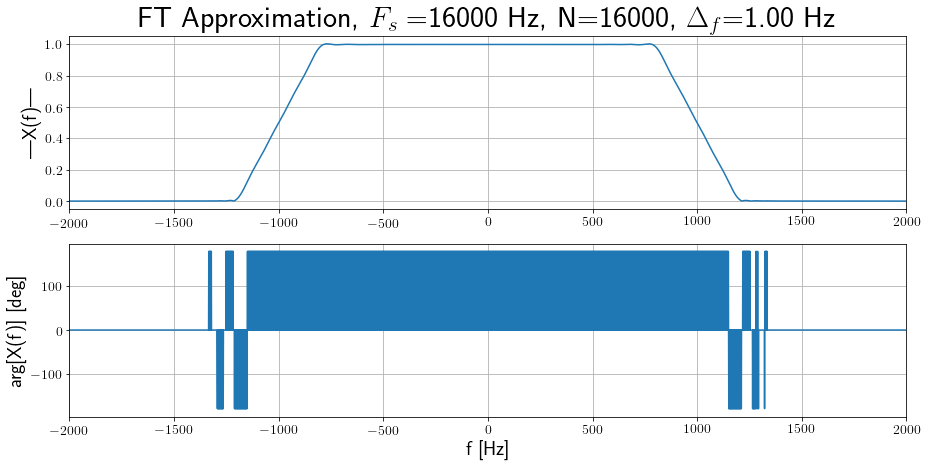

In [4]:
Fs = 16000      # Sampling Frequency
fL = 1000       # Cutoff Frequency
alpha = .20001  # Rolloff Parameter
k = 20          # Truncation Parameter
sig = [0]*Fs
sig[int(Fs/2)] = Fs

sig_w = sdr.sigWave(sig, Fs, 0)
[sig_w, order]= sdr.trapfilt0(sig_w, fL, k, alpha, 1, 0)
ft.showft(sig_w, [-2000, 2000, 1e-3], 1)

f1:  -2000.0 | f2:  2000.0  | llim:  -80.0


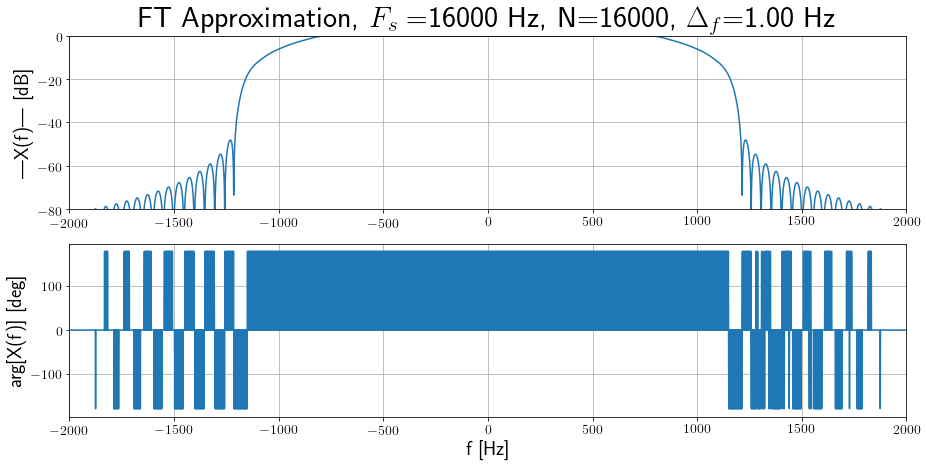

In [5]:
ft.showft(sig_w, [-2000, 2000, -80], 2)

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.c - Trapfilt on .wav File**

### --------------------------------------------------------------------------------------------------------------

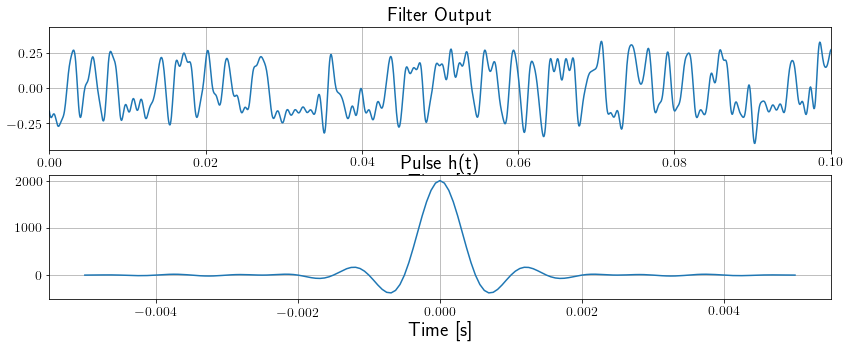

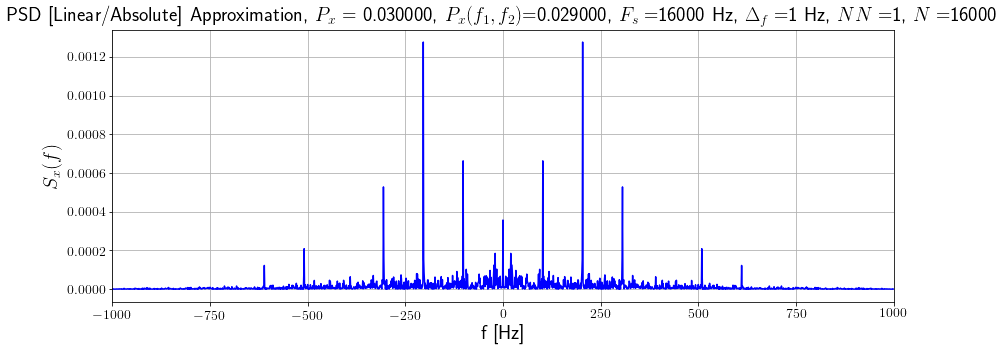

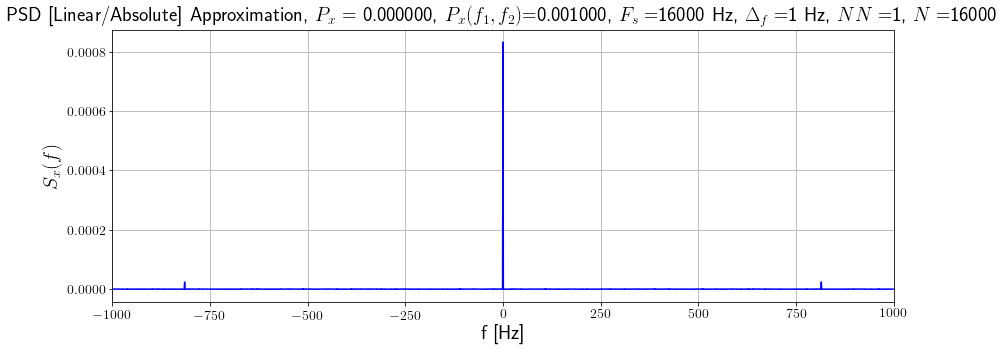

In [6]:
[sig601, Fs] = sdr.wavread('pamsig601.wav')
sig601_w = sdr.sigWave(sig601, Fs, 0)      # Combined sinusoidal signal

fL = 1000       # Cutoff Frequency
alpha = .20001  # Rolloff Parameter
k = 10          # Truncation Parameter

[sig601_wf, order]= sdr.trapfilt0(sig601_w, fL, k, alpha, 1, .1)
sig601_fc = sig601_wf.sig.copy()
sig601_fc = sig601_fc**2
sig601_wfc = sdr.sigWave(sig601_fc, Fs, 0)      # Combined sinusoidal signal


window = 1000
ft.showpsd0(sig601_wf,[-window, window, 0],Fs)   # Plot S_x(f)
ft.showpsd0(sig601_wfc, [-window, window, 0], Fs)
# ft.showpsd0(sig601_wf,[-window, window, -30],Fs)   # Plot S_x(f)

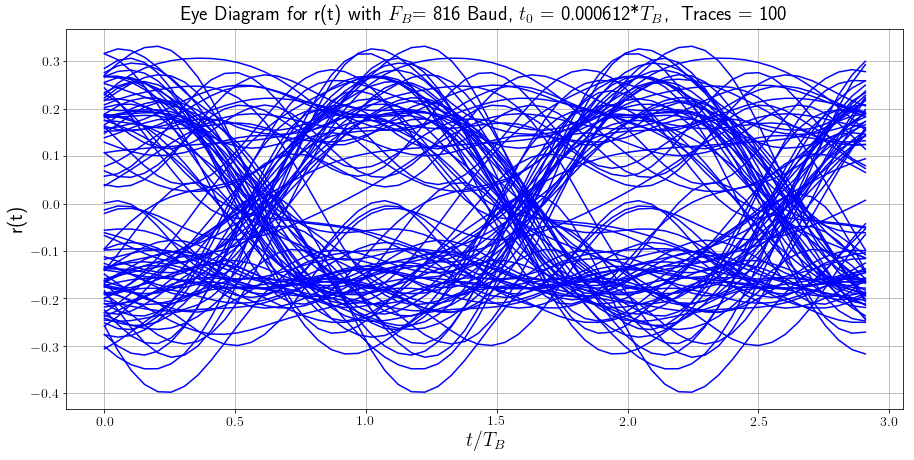

In [7]:
# FB = 407   # Baud rate (from psd wo/**2)
FB = 816.59

NTd = 100   # Number of traces displayed
L = 2       # Number of data levels
dly = .5   # Trigger delay TB/2

ft.showeye(sig601_wf, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

### --------------------------------------------------------------------------------------------------------------
 
 - ** 1.d - GRC Trapfilt Module **

### --------------------------------------------------------------------------------------------------------------

To test my trapfilt_taps function I made a GRC flowgraph to pass a sinusoid throught the filter. I used a slider to adjust frequency to see the affect of the filter. 

Flowgraph:

![title](img/Exp1d.png)

The filters function can be seen here. At an input frequency of 1000 Hz the sinusoid is attenuated to an amplitude of .5. (trapfilt alpha = .2)

![title](img/Exp1d_1.png)

While at an input frequency of 1200 Hz (200 Hz above the filter cutoff frequency) the sinusoid is almost completely reduced

![title](img/Exp1d_2.png)

## Experiment 2:  PAM Transmitter/Reciever 

### ----------------------------------------------------------------------------------------------------------------
 
 - ** 2.a - Update PAM11 Module to Include RRCF **

### ----------------------------------------------------------------------------------------------------------------

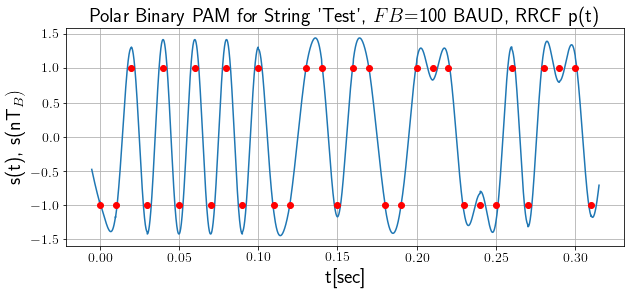

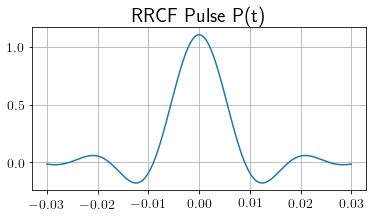

In [8]:
Fs = 44100 # Sampling rate
FB = 100   # Baud rate
N = FB     # Number of symbols
k = 3      #
alpha = .401 # 
beta = 4
polarity = 'polar' # Specify display polarity
an = ascbin.asc2bin('Test')
an = [int(x) for x in an]

# Single pulse, padded with zeros
sig_an = sdr.sigSequ(an, FB, 0)
ptype = 'rrcf'
pparms = [k, alpha]
sig_pt0 = sdr.pam12(sig_an,Fs,ptype,polarity,2,pparms) #Generate PAM pulse

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.b - PAM Reciever **

### --------------------------------------------------------------------------------------------------------------

In [9]:
# Hecho

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.c - Test PAM Reciever with Noisy PAM Signals**

### --------------------------------------------------------------------------------------------------------------

----- pamsig601.wav -----

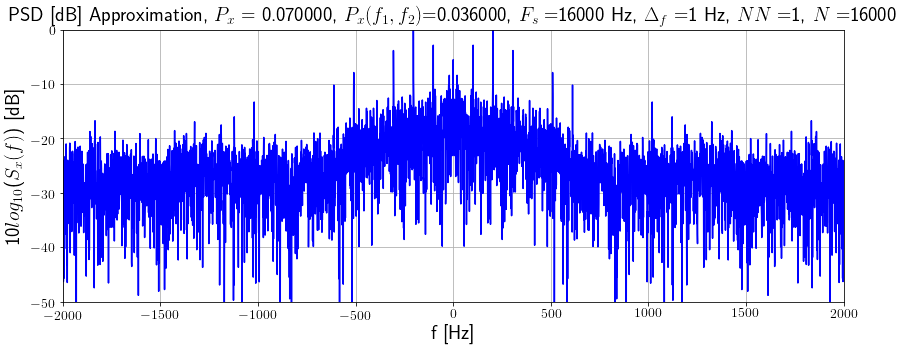

In [10]:
# Read the file 
[sig601, Fs] = sdr.wavread('pamsig601.wav')
sig601_w = sdr.sigWave(sig601, Fs, 0)      # Combined sinusoidal signal
window = 2000
# Look at the decibal representation of PSD
ft.showpsd0(sig601_w,[-window, window, -50],Fs)   # Plot S_x(f)
# Use trapfilt now with 1000 fc as it looks like that will be plenty based
# on the PSD plot
[sig601_wf, order]= sdr.trapfilt0(sig601_w, 1000, 20, .401, 0, .1)

From this, we can see that the pulse used must have been a rectangle or triangle based on the repeating but damped peaks at higher frequencies

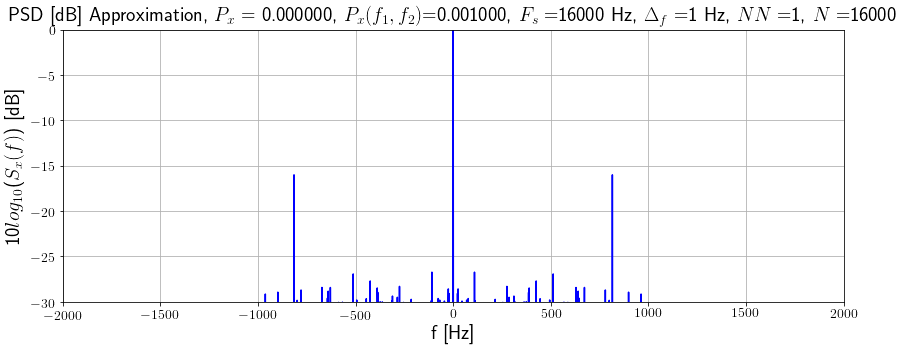

In [11]:
# Now look at the PSD squared to determine BAUD rate
sig601_fc = sig601_wf.sig.copy()
sig601_fc = sig601_fc**2
sig601_wfc = sdr.sigWave(sig601_fc, Fs, 0)      # Combined sinusoidal signal

ft.showpsd0(sig601_wfc,[-window, window, -30],Fs)   # Plot S_x(f)

Zoom in to look at the peak around 800 Hz

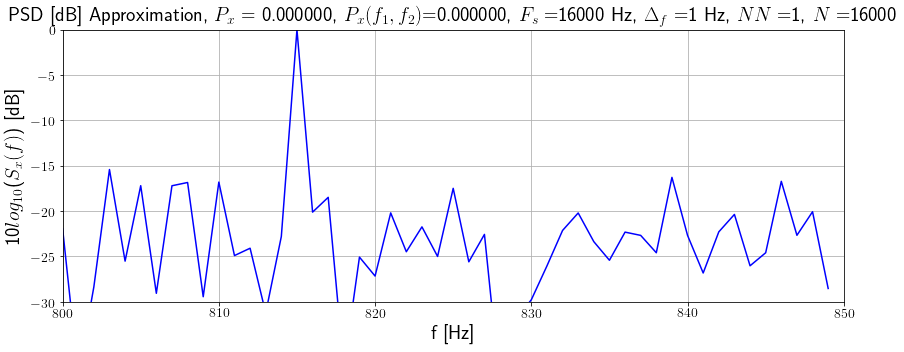

In [12]:
ft.showpsd0(sig601_wfc,[800, 850, -30],Fs)   # Plot S_x(f)

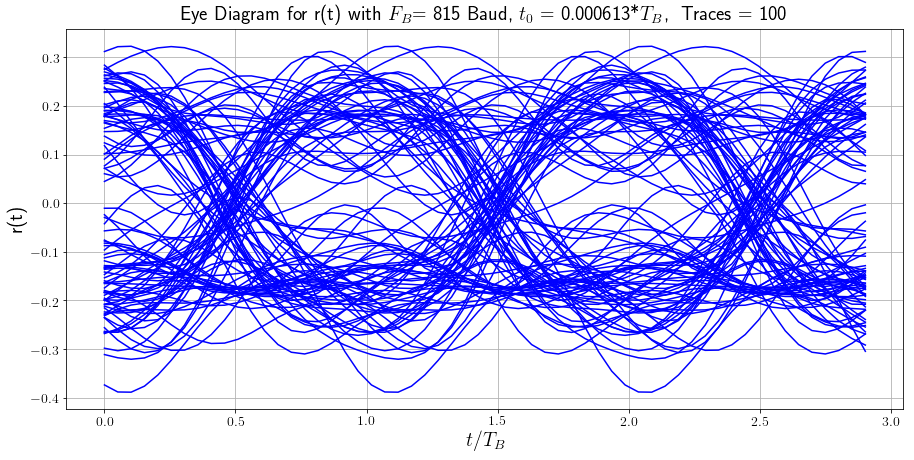

In [13]:
# From the above plots, use 815 as the BAUD rate
FB = 815# Baud rate
NTd = 100   # Number of traces displayed
L = 2       # Number of data levels
dly = .5   # Trigger delay TB/2

ft.showeye(sig601_wf, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

This is ok, but if we filter this using our pamrcvr and look at the showeye again we can see it is much better due to the matched filter

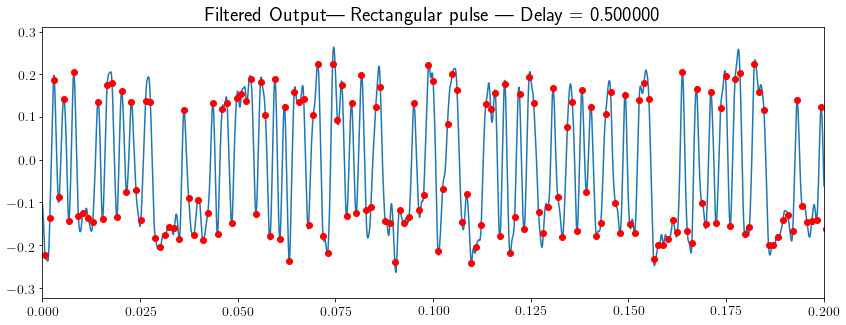

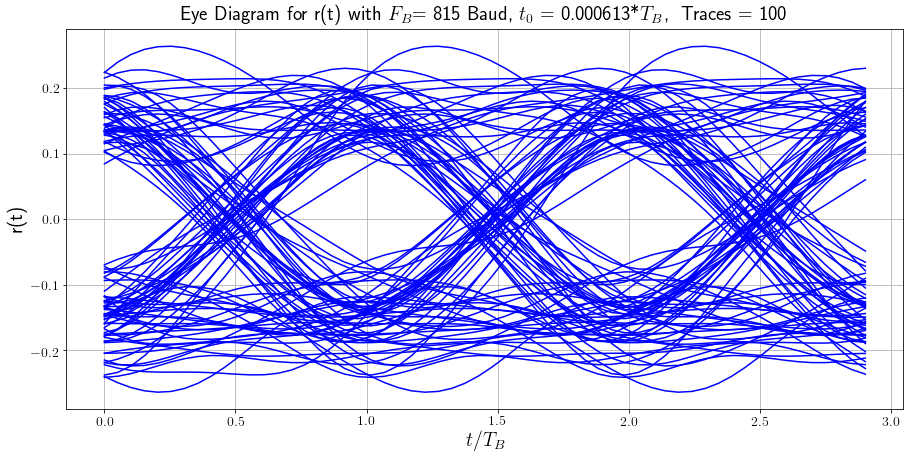

In [14]:
FBparms = [FB, dly]
ptype = 'rect'
# power is much more spread out in the rectangular pulse so a sinc loses too much power in the matched filter
k = 10
alpha = 4
pparms = [k, alpha]
[sig601_pam, sig601_pam_w, ixn] = sdr.pamrcvr10(sig601_wf, FBparms, ptype, [1, .2], pparms)
ft.showeye(sig601_pam_w, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

# for manchester check if there is a zero dc in psd

Now, extract the message:

In [15]:
bn601 = ascbin.binthresh(sig601_pam.sig)
txt601 = ascbin.bin2asc(bn601)
print(txt601)

 The house spider is there to bring good luck!
Most spiders have 8 eyes and 8 legs.
Is that why some of them "byte"?


----- pamsig602.wav -----

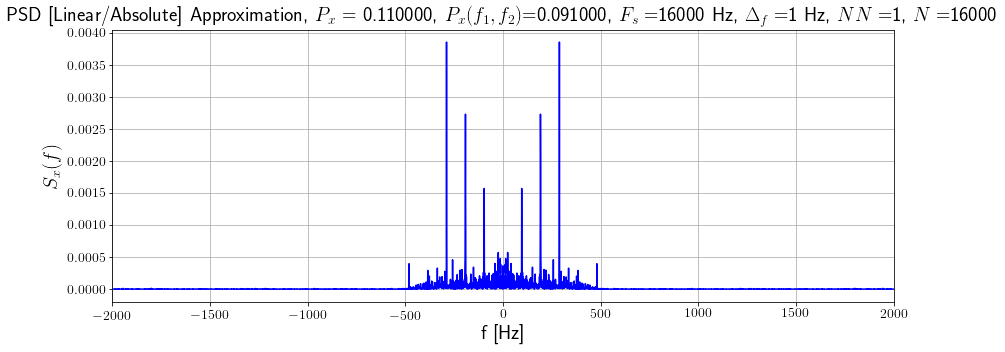

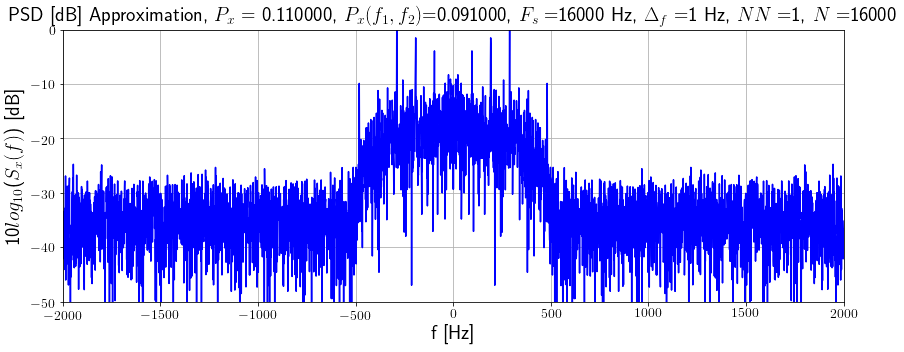

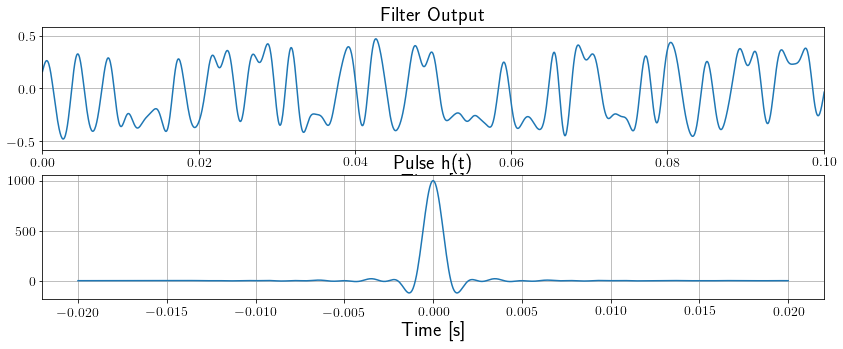

In [16]:
[sig602, Fs] = sdr.wavread('pamsig602.wav')
sig602_w = sdr.sigWave(sig602, Fs, 0)      # Combined sinusoidal signal
window = 2000
ft.showpsd0(sig602_w,[-window, window, 0],Fs)   # Plot S_x(f)
# Look at the PSD to determine pulse type and cufoff frequency
ft.showpsd0(sig602_w,[-window, window, -50],Fs)   # Plot S_x(f)
# Use trapfilt now with 1000 fc as it looks like that will be plenty based
# on the PSD plot
[sig602_wf, order]= sdr.trapfilt0(sig602_w, 500, 20, .401, 1, .1)

It looks as though a cutoff frequency of 500 Hz would work well and that the pulse type must be a sinc, rcf or rrcf

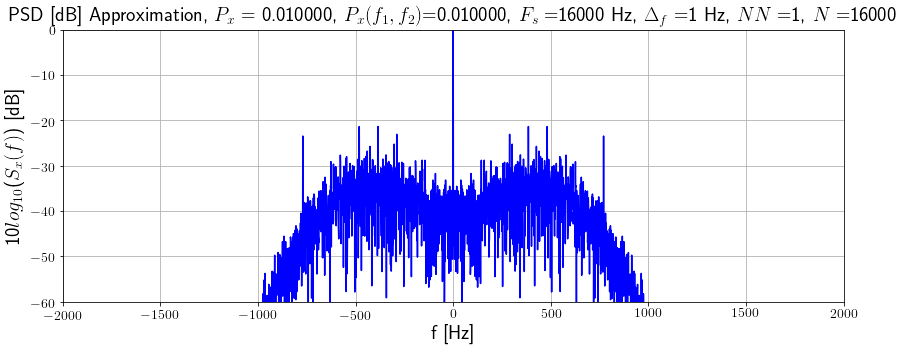

In [17]:
# Now look at the PSD squared to determine BAUD rate
sig602_fc = sig602_wf.sig.copy()
sig602_fc = sig602_fc**2
sig602_wfc = sdr.sigWave(sig602_fc, Fs, 0)      # Combined sinusoidal signal

ft.showpsd0(sig602_wfc,[-window, window, -60],Fs)   # Plot S_x(f)

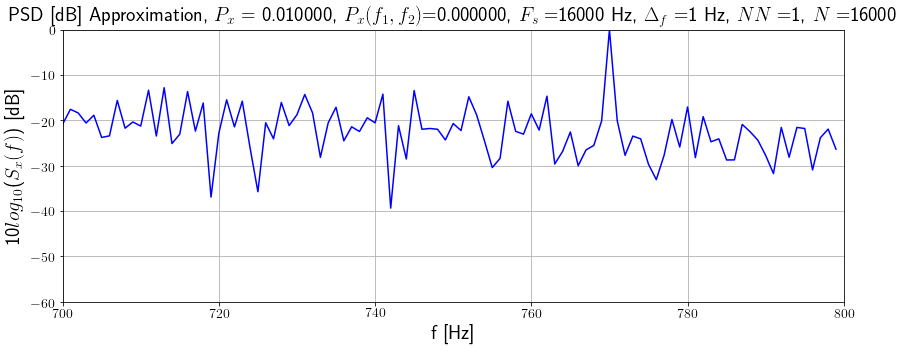

In [18]:
ft.showpsd0(sig602_wfc,[700, 800, -60],Fs)   # Plot S_x(f)

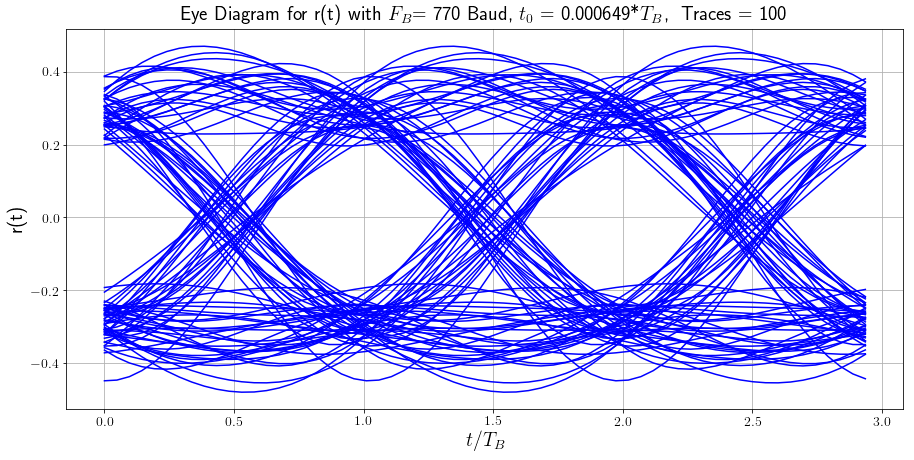

In [19]:
FB = 770    # Baud rate
NTd = 100         # Number of traces displayed
L = 2             # Number of data levels
dly = 0.5          # Trigger delay TB/2

ft.showeye(sig602_wf, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

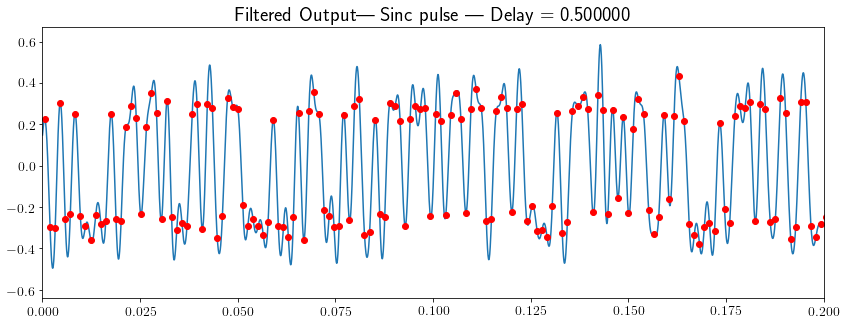

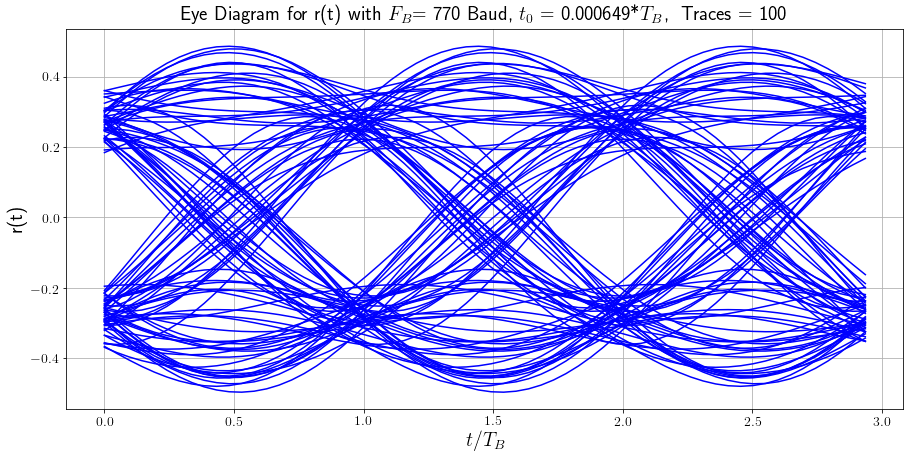

In [20]:
FBparms = [FB, dly]
ptype = 'sinc'
# power is much more spread out in the rectangular pulse so a sinc loses too much power in the matched filter
k = 10
beta = .2001
pparms = [k, beta]
[sig602_pam, sig602_pam_w, ixn] = sdr.pamrcvr10(sig602_wf, FBparms, ptype, [1, .2], pparms)
ft.showeye(sig602_pam_w, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

# for manchester check if there is a zero dc in psd

Now, convert to ASCII

In [21]:
bn602 = ascbin.binthresh(sig602_pam.sig)
txt602 = ascbin.bin2asc(bn602)
print(txt602)

 I was thrown out of college for cheating on the metaphysics exam;
I looked into the soul of the boy sitting next to me. (Woody Allen)


----- pamsig603.wav -----

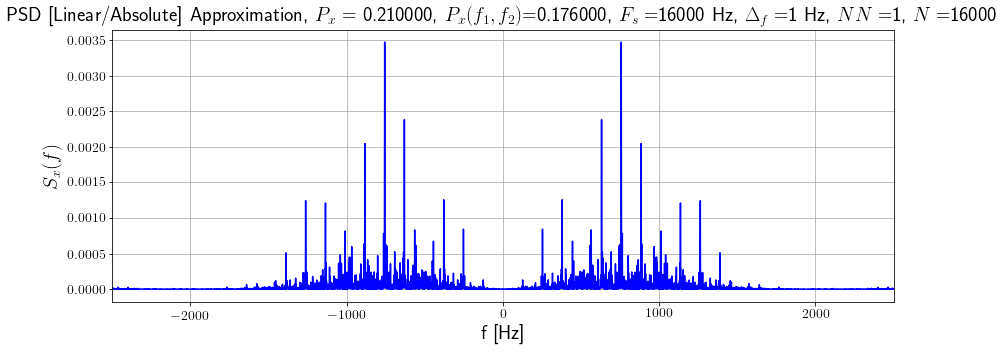

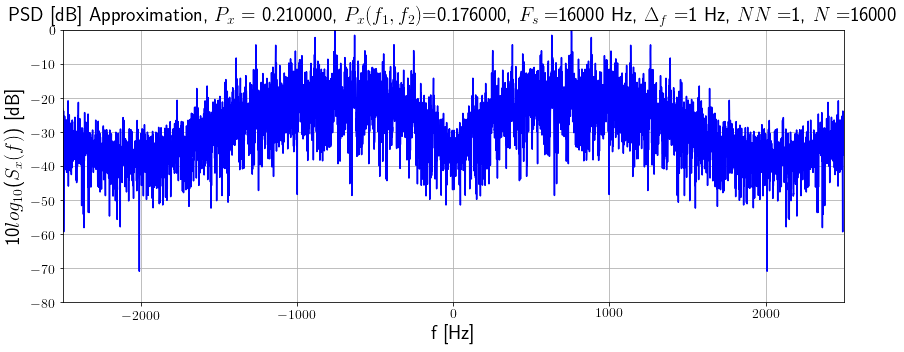

In [22]:
[sig603, Fs] = sdr.wavread('pamsig603.wav')
sig603_w = sdr.sigWave(sig603, Fs, 0)      # Combined sinusoidal signal
window = 2500
ft.showpsd0(sig603_w,[-window, window, 0],Fs)   # Plot S_x(f)
ft.showpsd0(sig603_w,[-window, window, -80],Fs)   # Plot S_x(f)
[sig603_wf, order]= sdr.trapfilt0(sig603_w, 1500, 20, .401, 0, .1)

This signal has 0 DC component. So, it must have been using a manchester pulse

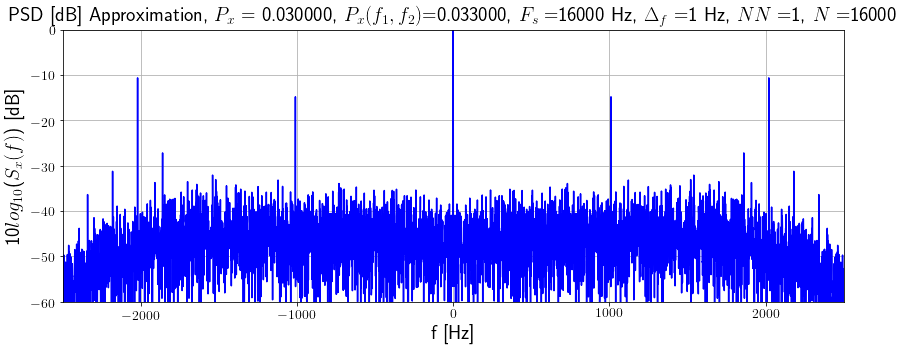

In [23]:
# Now look at the PSD squared to determine BAUD rate
sig603_fc = sig603_wf.sig.copy()
sig603_fc = sig603_fc**2
sig603_wfc = sdr.sigWave(sig603_fc, Fs, 0)      # Combined sinusoidal signal

ft.showpsd0(sig603_wfc,[-window, window, -60],Fs)   # Plot S_x(f)

Zoom in to look at the peak around 1000 Hz

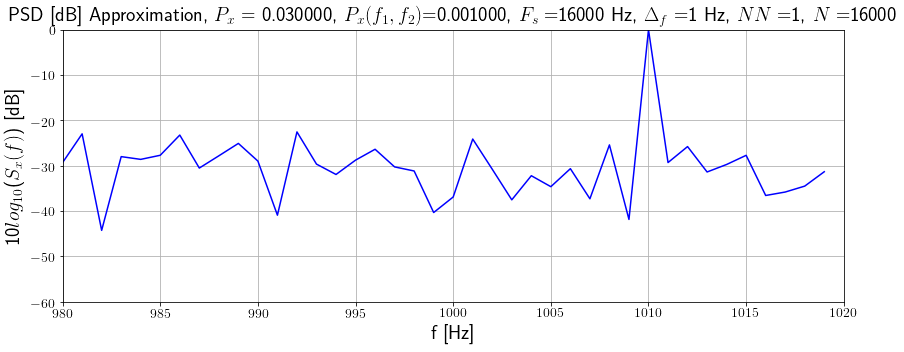

In [24]:
ft.showpsd0(sig603_wfc,[980, 1020, -60],Fs)   # Plot S_x(f)

It looks like the BAUD will be 1010 Hz

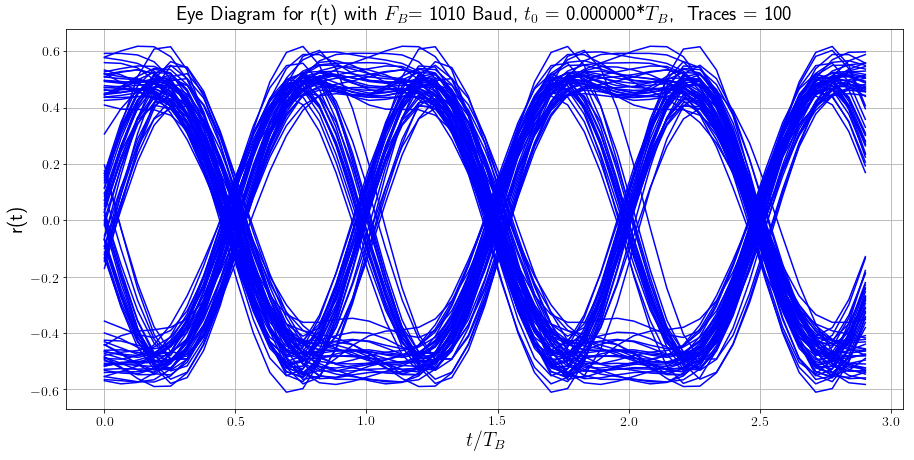

In [25]:
FB = 1010     # Baud rate
NTd = 100   # Number of traces displayed
L = 2      # Number of data levels
dly = 0   # Trigger delay TB/2

ft.showeye(sig603_wf, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

This is ok, but if we filter this using our pamrcvr and look at the showeye again we can see it is much better due to the matched filter

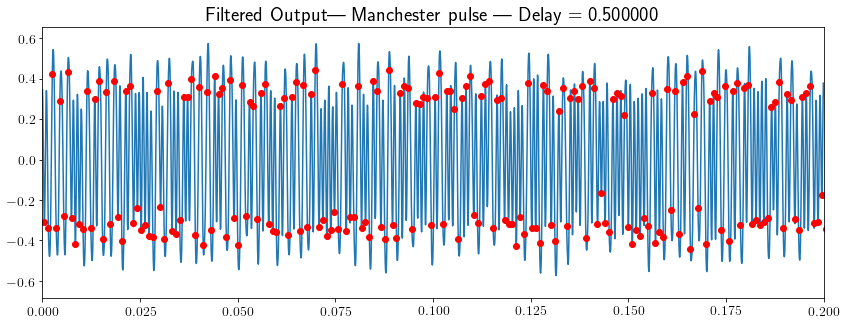

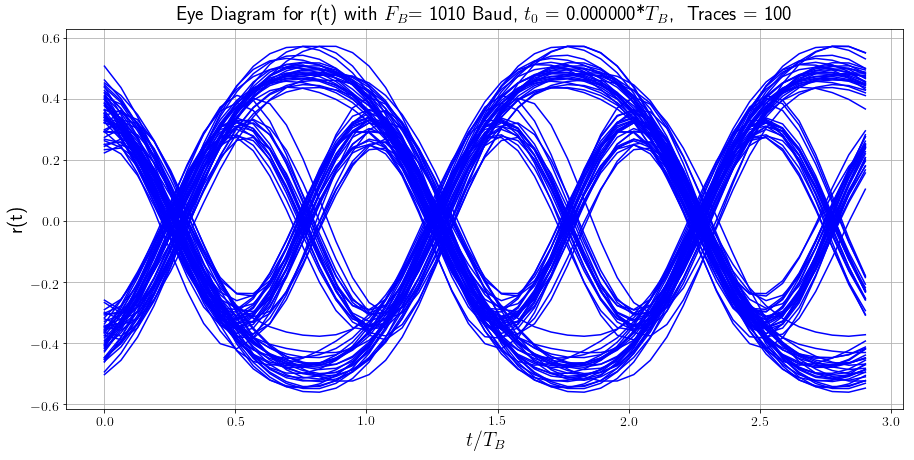

In [26]:
FBparms = [FB, .5]
ptype = 'man'
# power is much more spread out in the rectangular pulse so a sinc loses too much power in the matched filter
k = 10
alpha = 4
pparms = [k, alpha]
[sig603_pam, sig603_pam_w, ixn] = sdr.pamrcvr10(sig603_wf, FBparms, ptype, [1, .2], pparms)
ft.showeye(sig603_pam_w, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

Now, extract the ASCII text:

In [27]:
bn603 = ascbin.binthresh(sig603_pam.sig)
# print(len(bn603))
# bn603 = bn603[0:]
# print(len(bn603))
txt603 = ascbin.bin2asc(bn603)
print(txt603)

 The quick brown fox jumps over the lazy dog 0123456789.
The quick brown fox jumps over the lazy dog 0123456789.
The quick brown fox jumps over the lazy dog 0123456789.


### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.e - GRC Flowgraphs**

### --------------------------------------------------------------------------------------------------------------

![title](img/Exp2e_man.png)

A value of An = .9 introduced approximately 1 bad characters out of 100. 

![title](img/Exp2e_rect.png)

![title](img/Exp2e_rrcf.png)

The rrcf and rect pulses seemed to handle slightly less noise with an An = .8 yielding app. 1 bad char out of a 100.

### --------------------------------------------------------------------------------------------------------------
 
 - ** 2.f - GRC Flowgraph using Polyphase Block**

### --------------------------------------------------------------------------------------------------------------

I was not able to get either rect or man pulses to work with the polyphase block. I kept getting odd errors for gnu radio referencing my pampt taps. However, as shown below, my filter taps are working fine:

![title](img/Exp2f.png)

![title](img/Exp2e_rrcf.png)

The rrcf pulse performs approximately the same using the polyphase block as without. 